# Q2. Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased. The attributes in the datasets are as follows:

 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No;1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
 - Name	- Name
 - Sex - Sex
 - Age - Age
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin 
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

## Import Libraries
Import all necessary libraries


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into `X_test` and `y_test`.  The `df_train` data has NOT been preprocessed and you will need to preprocess and prepare the `df_train` dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate the data preprocessing, scaling requirements we need to perform.

In [3]:
df_test = pd.read_csv('df_test.csv')
df_train = pd.read_csv('df_train.csv')

2. The resulting dataframe (I.e., `df_train`) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [4]:
print(df_train.shape)

(712, 12)


3. In the `df_train` dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [5]:
df_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,574.000000,712.000000,712.000000,712.000000,712.000000
mean,448.814607,2.283708,29.811847,0.560393,0.396067,32.658449,0.387640
std,254.509947,0.847509,14.829776,1.139622,0.799357,46.136193,0.487554
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,228.750000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,448.500000,3.000000,28.000000,0.000000,0.000000,15.245800,0.000000
75%,668.250000,3.000000,38.000000,1.000000,1.000000,31.387500,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [6]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
2,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
3,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1


4. Use the `pandas.isnull().sum()` function check if there are any missing values in the `df_train` dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [7]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

5. Use the `pandas.DataFrame.drop()` function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [8]:
df_train = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)

6. Use the `pandas.DataFrame.fillna()` function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called *imputation* (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the `dropna()` function to drop any remaining rows that consist of NA values.

In [9]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train = df_train.dropna()

7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe `X_train` of features (by dropping the ‘Survival’ column from the `df_train` dataframe). Create a pandas Series object of targets `y_train` (by only considering the ‘Survival’ column from the `df_train` dataframe). Moving forward, we will be working with `X_train` and `y_train`. At this point also split the `df_test` into `X_test` and `y_test` by dropping the ‘Survival’ column and storing the features into `X_test`. Store only the ‘Survival’ column in `y_test`.

In [10]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [11]:

X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

#### ii. Data Visualization

1. Using matplotlib employ a scatter plot using `matplotlib.pyplot.scatter` between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title. Answer the questions specified in your solution document.

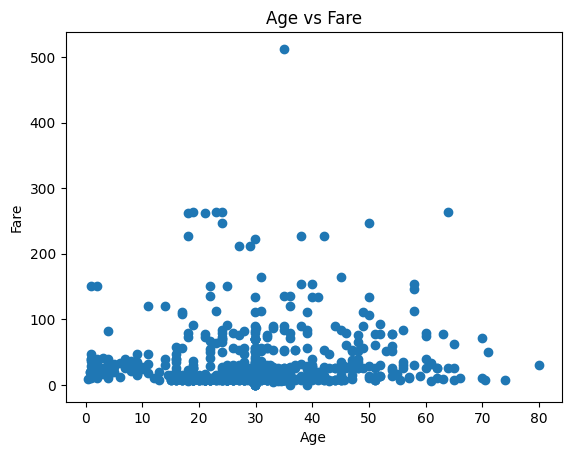

Max Fare: 512.3292
Min Fare: 0.0
Max Age: 80.0
Min Age: 0.42


In [12]:
plt.scatter(X_train['Age'], X_train['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()
print(f'Max Fare: {max(X_train['Fare'])}')
print(f'Min Fare: {min(X_train['Fare'])}')
print(f'Max Age: {max(X_train['Age'])}')
print(f'Min Age: {min(X_train['Age'])}')

2. **Only for this question** use the `df_train` dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using `matplotlib.pyplot.bar` (Passenger Class column). Answer the questions specified in your solution document.

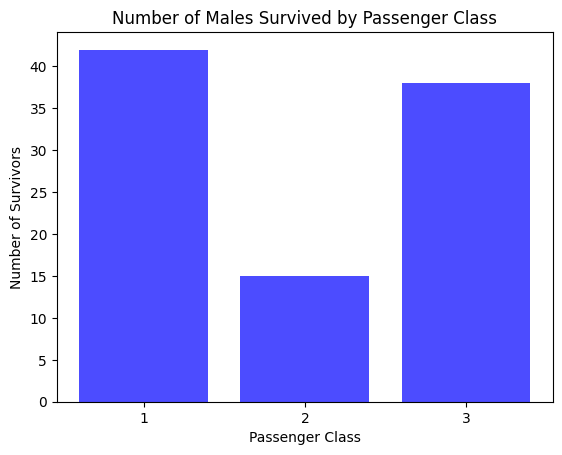

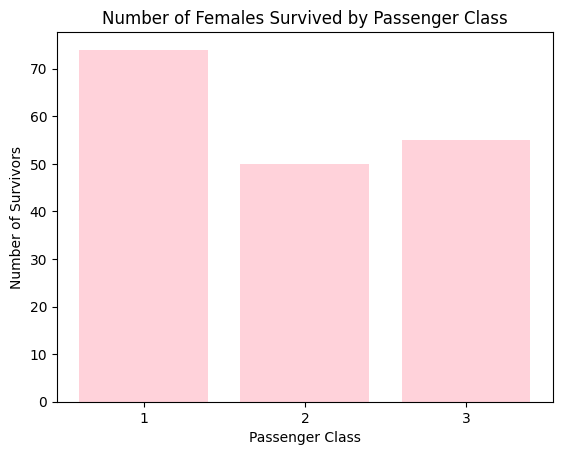

In [13]:
# Filter data for males and females who survived
males_survived = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]
females_survived = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]

# Count the number of survivors by passenger class for males and females
males_survived_count = males_survived['Pclass'].value_counts().sort_index()
females_survived_count = females_survived['Pclass'].value_counts().sort_index()

# Plot bar chart for males
plt.bar(males_survived_count.index, males_survived_count.values, color='blue', alpha=0.7)
plt.title('Number of Males Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.xticks(males_survived_count.index)
plt.show()

# Plot bar chart for females
plt.bar(females_survived_count.index, females_survived_count.values, color='pink', alpha=0.7)
plt.title('Number of Females Survived by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.xticks(females_survived_count.index)
plt.show()

3. Using the Target variable (Survived) in `y_train`, plot a bar chart showing the distribution of the ‘Survived’ column. Answer the questions specified in your solution document.

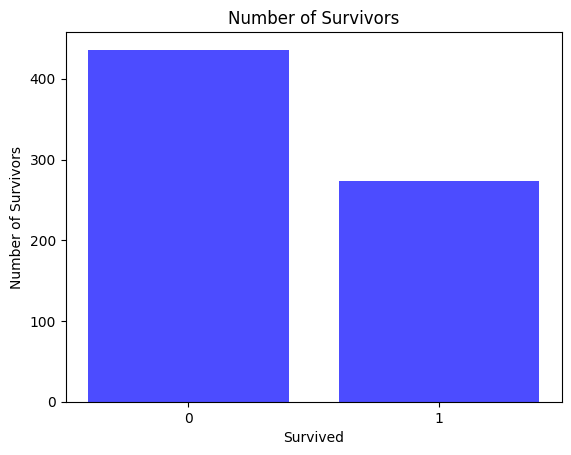

In [14]:
plt.bar(y_train.value_counts().index, y_train.value_counts().values, color='blue', alpha=0.7)
plt.title('Number of Survivors')
plt.xlabel('Survived')
plt.ylabel('Number of Survivors')
plt.xticks(y_train.value_counts().index)
plt.show()

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the `pd.get_dummies()` function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on `X_train` and store the result back into `X_train`). Answer the questions specified in your solution document. 

In [15]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,710.000000,710.000000,710.000000,710.000000,710.000000
mean,2.287324,29.754979,0.561972,0.397183,32.525093
std,0.845953,13.273197,1.140839,0.800207,46.132555
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,8.050000
50%,3.000000,29.811847,0.000000,0.000000,15.245800
75%,3.000000,35.000000,1.000000,1.000000,31.275000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
X_train.shape

(710, 8)

In [17]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,29.811847,0,0,30.5000,True,False,True
1,3,27.000000,0,2,11.1333,False,False,True
2,2,29.811847,0,0,0.0000,True,False,True
3,3,9.000000,4,2,31.2750,False,False,True
4,1,48.000000,1,0,39.6000,False,False,False


#### iii. Data Scaling

1. Employ `X_train` and `MinMaxScaler` only on the continuous attributes. Employ the `fit_transform()` function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in `X_train` again. 

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

2. Scale the `X_test` using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into `X_test`.  At the end of this step, you must have `X_train`, `X_test`, all scaled according to the `MinMaxScaler`.

In [19]:
X_test = scaler.transform(X_test)

### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Name/Label this model as `model_lr`  

In [20]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled `X_train`, `y_train` data.

In [21]:
model_lr.fit(X_train, y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable named `y_pred_lr`.

In [22]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the `accuracy_score` function by using the `y_pred_lr` and `y_test` variables as the function parameters and print the accuracy of the Logistic Regression model. 

In [23]:
print(accuracy_score(y_test, y_pred_lr))

0.888268156424581


In [24]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       113
           1       0.87      0.82      0.84        66

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



#### ii. Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1. Employ the Support Vector Machine (SVM) classifier from sklearn (SVC) and instantiate the model. Make sure to set `probability=True` when creating the model. Label/Name this model as `model_svm`

In [25]:
model_svm = SVC(probability=True)

2. Once instantiated, `fit()` the model using the scaled `X_train`, `y_train` data.

In [26]:
model_svm.fit(X_train, y_train)

SVC(probability=True)

3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable named `y_pred_svm`.

In [27]:
y_pred_svm = model_svm.predict(X_test)

4. Employ the `accuracy_score` function by using the `y_pred_svm` and `y_test` variables as the functions parameters and print the accuracy of the SVM model. 

In [28]:
print(accuracy_score(y_test, y_pred_svm))

0.8659217877094972


In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       113
           1       0.96      0.67      0.79        66

    accuracy                           0.87       179
   macro avg       0.90      0.82      0.84       179
weighted avg       0.88      0.87      0.86       179



#### iii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20.csv`, `df_train_noise40.csv`, `df_train_noise60.csv`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label/Name this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label/Name this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

After running all steps, make sure to answer the question specified in your solution document.

In [30]:
def analyze_model(model, scaler,
                  training_file, test_file='df_test', 
                  report=accuracy_score):
    df_train_noise = pd.read_csv(f'{training_file}.csv')
    X_train = df_train_noise.drop('Survived', axis=1)
    y_train = df_train_noise['Survived']

    df_test = pd.read_csv(f'{test_file}.csv')
    X_test = df_test.drop('Survived', axis=1)
    y_test = df_test['Survived']

    X_train = scaler.fit_transform(X_train)

    model.fit(X_train, y_train)
    y_pred_lr = model.predict(X_test)
    print(report(y_test, y_pred_lr))

In [31]:
for i in ['20', '40', '60']:
    model = LogisticRegression()
    scaler = MinMaxScaler()
    analyze_model(model, scaler, f'df_train_noise{i}')

0.7094972067039106
0.6759776536312849
0.3128491620111732


#### iv. Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_noise40`, `df_train_noise60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).  

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20`’ we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable. 
     
**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.**
Train a new SVM classification model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label/Name this model as `model_svm_noise_<nl>`.  Specifically, do the following:
1. Employ a new SVM classifier from sklearn and instantiate the model. Label/Name this model as `model_svm_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data. 
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_svm_noise<nl>`.  
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

After running all steps, make sure to answer the question specified in your solution document.

In [32]:
for i in ['20', '40', '60']:
    model = SVC(probability=True)
    scaler = MinMaxScaler()
    analyze_model(model, scaler, f'df_train_noise{i}')

0.6312849162011173
0.6312849162011173
0.6312849162011173


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the `model_lr` model and the `model_svm` along with a confusion matrix for each of them. 

In [33]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       113
           1       0.87      0.82      0.84        66

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       113
           1       0.96      0.67      0.79        66

    accuracy                           0.87       179
   macro avg       0.90      0.82      0.84       179
weighted avg       0.88      0.87      0.86       179

[[105   8]
 [ 12  54]]


#### ii. Report the accuracy and classification report for each of the noisy models (`model_lr_noise<nl>`, `model_svm_noise<nl>`). 

In [34]:
for i in ['20', '40', '60']:
    model = LogisticRegression()
    scaler = MinMaxScaler()
    analyze_model(model, scaler, f'df_train_noise{i}', report=classification_report)

for i in ['20', '40', '60']:
    model = SVC(probability=True)
    scaler = MinMaxScaler()
    analyze_model(model, scaler, f'df_train_noise{i}', report=classification_report)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       113
           1       0.75      0.32      0.45        66

    accuracy                           0.71       179
   macro avg       0.73      0.63      0.62       179
weighted avg       0.72      0.71      0.67       179

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       113
           1       0.57      0.52      0.54        66

    accuracy                           0.68       179
   macro avg       0.65      0.64      0.64       179
weighted avg       0.67      0.68      0.67       179

              precision    recall  f1-score   support

           0       0.19      0.03      0.05       113
           1       0.33      0.80      0.46        66

    accuracy                           0.31       179
   macro avg       0.26      0.41      0.25       179
weighted avg       0.24      0.31      0.20       179

              preci

#### iii. Make a calibration plot for each of the models without noisy data (`model_lr`, `model_svm`).

Use the CalibrationDisplay class from sklearn.calibration to make your plot.

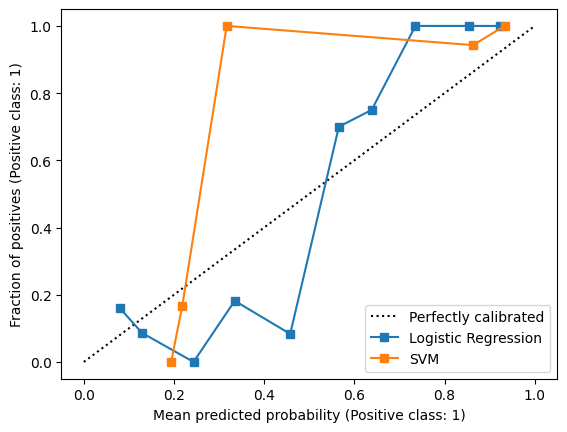

In [35]:
calibration = CalibrationDisplay.from_estimator(model_lr, X_test, y_test, n_bins=10, name='Logistic Regression')
CalibrationDisplay.from_estimator(model_svm, X_test, y_test, n_bins=10, name='SVM', ax=calibration.ax_)

## Finally, make sure to answer all the discussion questions in your solution document.